In [10]:
from SEIR_viral_load import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
#Define Parameters of Testing Policies

D = list(range(1,15))
L = [3, 5, 6]
inf_f = logproportional
asymptomatic = 0.65
dt = 0
cutoff = 6
se = .99
n_samples = 10000

Here we are treating the reproductive ratio as a function of "infectiousness". We can then approximate reductions in R
by seeing how much "infectiousness" a certain policy removes compared to no policy.



In [17]:
r_reduct_dict = {'3' : [], '5' : [], '6' : []}
for l in L:
    for d in D:
        r_reduct = get_R_reduction_factor(d, l, inf_f, asymptomatic, dt, cutoff, n_samples, se)
        r_reduct_dict[str(l)].append(r_reduct)

In [18]:
reduct_df = pd.DataFrame(r_reduct_dict)
reduct_df = reduct_df.shift(1).iloc[1:]

In [19]:
column_dict = {'3' : 'LOD 10^3', '5' : 'LOD 10^5', '6' : 'LOD 10^6'}
reduct_df.rename(columns=column_dict, inplace=True)

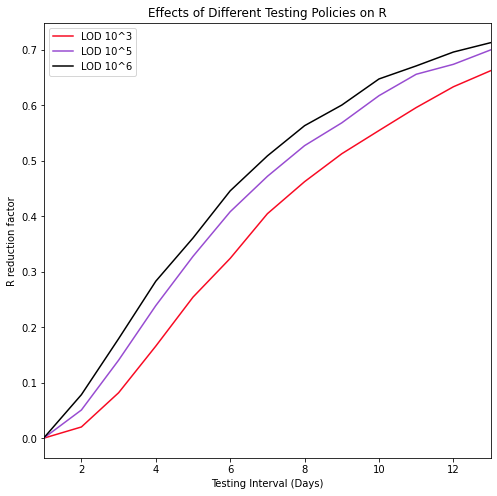

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Testing Interval (Days)")
ax.set_ylabel("R reduction factor")
ax.set_title("Effects of Different Testing Policies on R")
ax.set_xlim(1,13)
ax = sns.lineplot(data = reduct_df, palette=['#F80A23', '#984CD1', 'k'], dashes=False)
fig.savefig(r'Figures\TestingPolicyEffectonR.png')